# Лабораторная работа №3 по вычислительной математике

## Применение метода простой итерации и метода Ньютона для решения нелинейных уравнений и систем нелинейных уравнений

### Выполнил Филиппенко Павел -- студент группы Б01-009

#### Задание II.12.4 вариант и)

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math
import scipy.optimize

In [156]:
def f(x): return x**2 - np.exp(x)/5

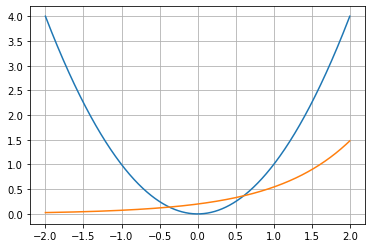

In [157]:
x = np.linspace(-2, 2, 1000)
plt.plot(x, x**2)
plt.plot(x, np.exp(x)/5)
plt.grid()

Для нелинейного уравнения 
$$x^2 - \frac{e^x}{5} = 0$$
составим метод простой итерации и докажем его сходимость.

Метод простой итерации:
$$x_{k + 1} = \pm \sqrt{\frac{e^x}{5}}$$

Достаточное условие сходимости метода простой итерации $x_{k+1} = \varphi(x_k)$:
$$|\varphi_x(\xi)'| < 1$$
где $\xi$ -- любое значение из области локализации.

Для нашего случая:
$$\varphi_x' = \frac{1}{2} \sqrt{\frac{e^x}{5}}$$

Заметим, что для любого значения из области локализации $|\varphi_x'| < 1 ~ \Rightarrow$ метод сходится.

In [158]:
def MSI(initial_sol):
    steps = 1000

    x_cur = initial_sol
    x_prev = 0

    for _ in range(steps):
        x_prev = x_cur

        if initial_sol >= 0:
            x_cur = math.sqrt(math.exp(x_prev)/5)
        else:
            x_cur = - math.sqrt(math.exp(x_prev)/5)

    return x_cur

In [159]:
solution1 = MSI(0.5)
print('The first solution by MSI %0.2f' %solution1)
print('Validate solution %0.2f' %(scipy.optimize.fsolve(f, [0.5])))

solution2 = MSI(-0.5)
print('The second solution by MSI %0.2f' %solution2)
print('Validate solution %0.2f' %(scipy.optimize.fsolve(f, [-0.5])))

The first solution by MSI 0.61
Validate solution 0.61
The second solution by MSI -0.37
Validate solution -0.37
